In [1]:
import numpy as np, seaborn as sns, matplotlib.font_manager as fm
import pandas as pd, os, subprocess
from pathlib import Path
from sm.prelude import M

/workspace/hugedict/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fm.fontManager.addfont("/home/rook/Dropbox/Fonts/CMU/ttf/cmunss.ttf")  # set font
sns.set_theme(font='CMU Sans Serif', font_scale=1)

In [11]:
db2size = {
    dir.name: int(subprocess.check_output(["du", "-hsm", str(dir.absolute())]).decode().split("\t")[0])
    for dir in Path("benchmarks/data/databases").iterdir()
}
target = "default"
for db, size in sorted(db2size.items(), key=lambda x: x[1]):
    print(f"{db}: {size}MB - {M.percentage(size, db2size[target])}")

default--compress-type=zstd-6-w-14: 585MB - 34.88% (585/1677)
default--compress-type=zstd-6-w14-rem: 586MB - 34.94% (586/1677)
default--compress-type=zstd-6-rem: 586MB - 34.94% (586/1677)
default--compress-type=bottom-zstd-6-w14-rem: 586MB - 34.94% (586/1677)
default--compress-type=zstd-6-w14-d10-rem: 604MB - 36.02% (604/1677)
default--compress-type=zstd-3-w14-rem: 656MB - 39.12% (656/1677)
default--compress-type=zstd-3-w-14-rem: 657MB - 39.18% (657/1677)
default--compress-type=zstd-3-w-14-d10-rem: 676MB - 40.31% (676/1677)
default--compress-type=zstd-6-w14: 1228MB - 73.23% (1228/1677)
default--compress-type=zstd-6: 1228MB - 73.23% (1228/1677)
default--compress-type=zstd: 1288MB - 76.80% (1288/1677)
zstd-6: 1395MB - 83.18% (1395/1677)
default--compress-type=lz4: 1667MB - 99.40% (1667/1677)
default: 1677MB - 100.00% (1677/1677)


In [14]:
df = pd.read_csv("benchmarks/data/runtime.txt")
tmp = df[['name', 'runtime']].groupby('name').agg(["mean", "sem", "count"]).sort_values(("runtime", "mean"))
tmp['percentage'] = tmp[('runtime', 'mean')] / tmp[('runtime', 'mean')]['zstd-6']
tmp

runtime                  \
                                                mean       sem count   
name                                                                   
zstd-6                                      0.559772  0.008456    20   
default--compress-type=zstd-3-w14-rem       0.582486  0.008009    20   
default--compress-type=zstd-3-w-14-d10-rem  0.583042  0.008261    20   
default--compress-type=zstd-3-w-14-rem      0.583996  0.010237    20   
default--compress-type=zstd-6-w-14          0.587112  0.011376    20   
default--compress-type=zstd-6-w14-d10-rem   0.633194  0.043243    20   

                                           percentage  
                                                       
name                                                   
zstd-6                                       1.000000  
default--compress-type=zstd-3-w14-rem        1.040577  
default--compress-type=zstd-3-w-14-d10-rem   1.041569  
default--compress-type=zstd-3-w-14-rem       1.043275  
default--compress-type=zstd-6-w-14           1.048842  
default--compress-type=zstd-6-w14-d10-rem    1.131163

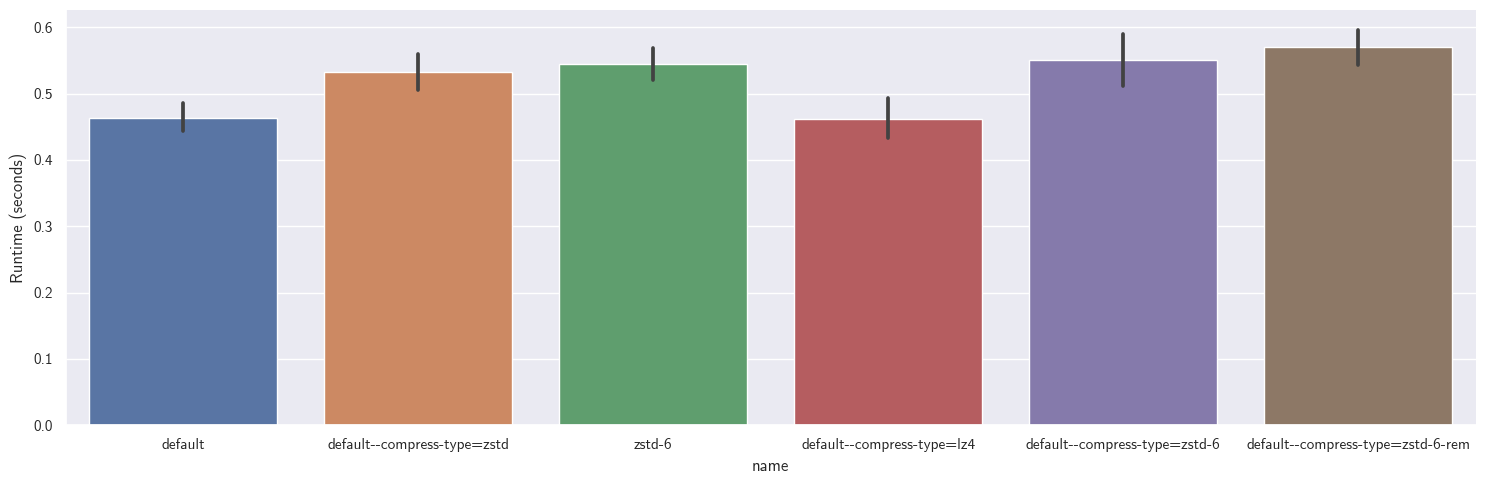

In [61]:
ax = sns.catplot(x="name", y="runtime", kind="bar", data=df, aspect=3)
ax.set(xlabel="name", ylabel="Runtime (seconds)")